# Titanic Data - Machine Learning

라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd

In [2]:
# graph size 조정
sns.set(rc={'figure.figsize':(15, 5)})
plt.style.use('fivethirtyeight')

data set

In [3]:
train_df = pd.read_csv('/Users/gwangyongkim/Documents/kaggle/titanic/train.csv')
test_df = pd.read_csv('/Users/gwangyongkim/Documents/kaggle/titanic/test.csv')

In [4]:
# 모델 적용의 일관성을 위해, train과 test를 합한 combine data set도 지정
combine=[train_df,test_df]

In [5]:
# train data의 변수 확인
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### train data 미리보기

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### test data 미리보기

In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## survival : 0=no, 1=yes
전체 생존자와 사망자는 얼마나 될 것인가?

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'survived')

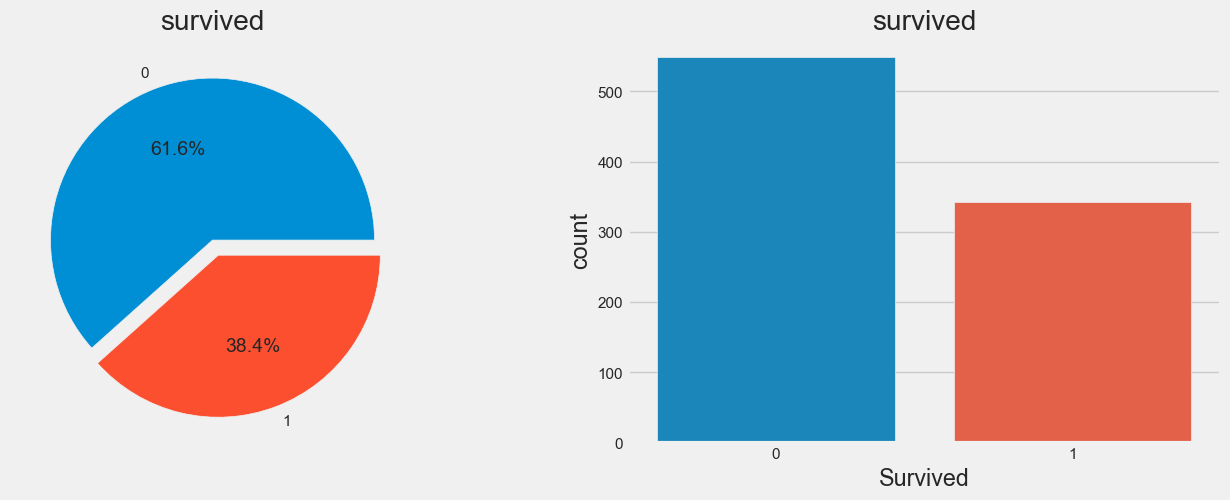

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=None)
# explode : 파이 조각이 돌출되는 크기(0이면 돌출x) - 2번째 파이조각을 돌출
# autopct : 파이 조각의 전체 대비 백분율 - 소수점 1자리까지 %로 표기
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_df,ax=ax[1])
ax[1].set_title('survived')

### groupby로 성별 생존자, 사망자 수 확인 -> survival : 0=no, 1=yes

In [39]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survived vs Dead')

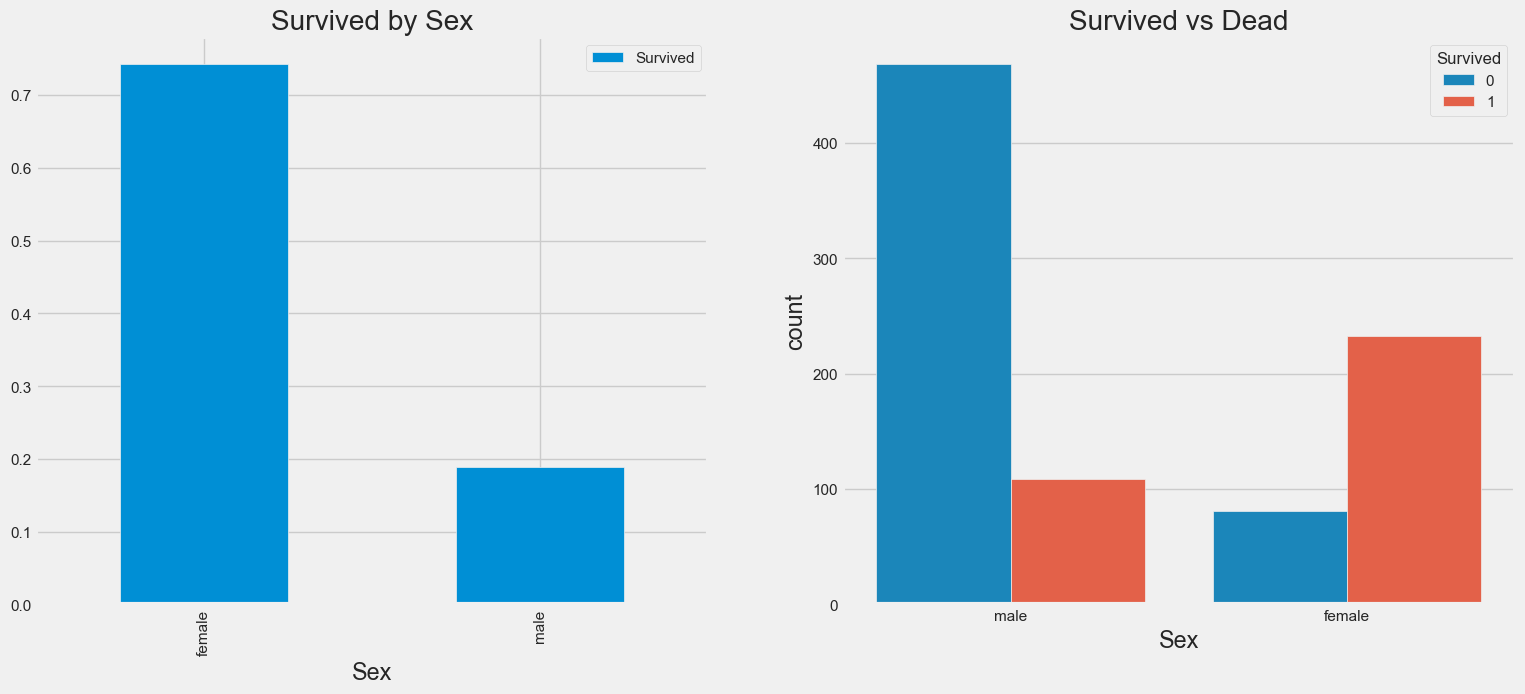

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(17,7))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived by Sex')
sns.countplot('Sex', hue='Survived', data=train_df, ax=ax[1])

ax[1].set_title('Survived vs Dead')

In [41]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


여성일수록 생존(Survived=1) 확률이 높아보인다. 생존자 예측시 중요한 변수 중 하나.

groupby로 Pclass별 생존자, 사망자 수 확인 -> survival : 0=no, 1=yes

In [42]:
train_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survived vs Dead by Pclass')

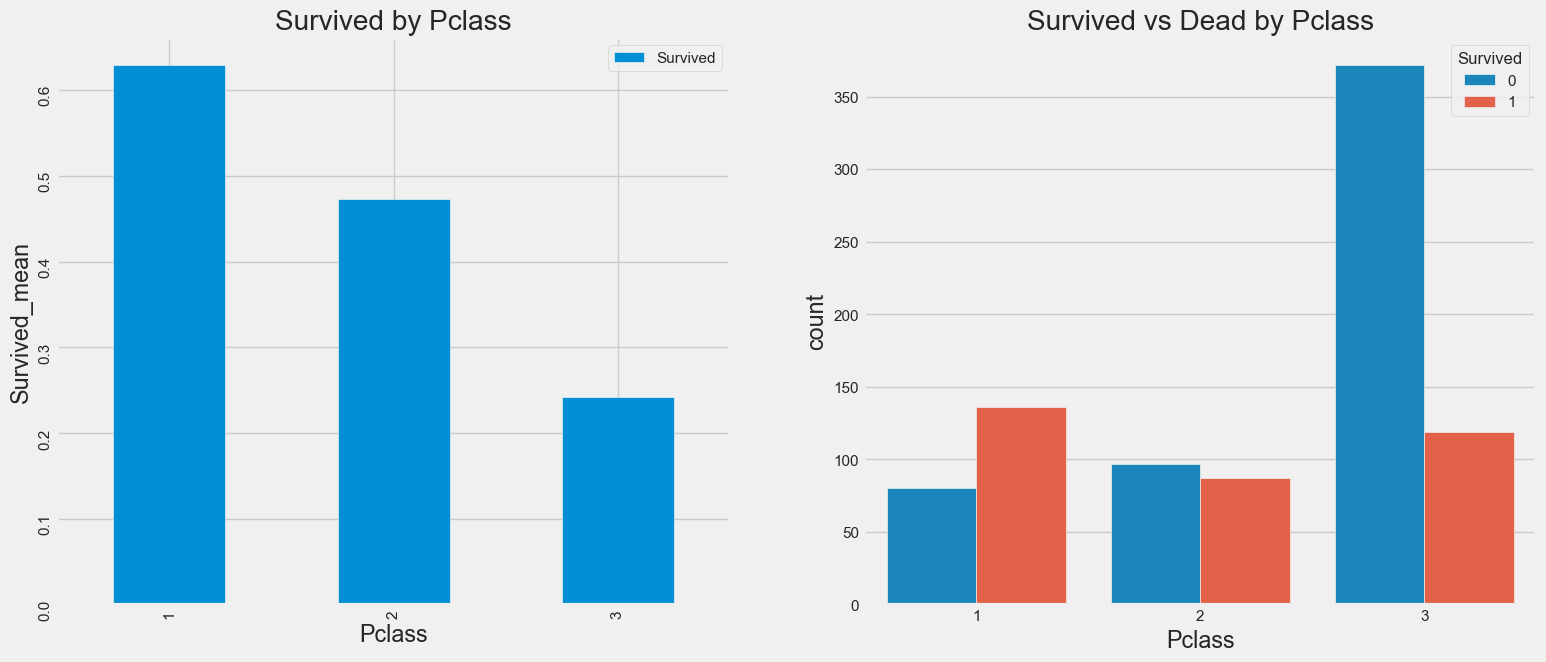

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(17,7))
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Survived_mean')

ax[0].tick_params(labelrotation=90)
# 아래와 같이도 가능
# train_df['Pclass'].value_counts().plot.bar(ax=ax[0])

ax[0].set_title('Survived by Pclass')


sns.countplot('Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived vs Dead by Pclass')

Pclass(객실 클래스)가 높을수록 생존(Survived=1) 확률이 높아보인다.

### crosstab으로 변수 케이스 별 value_count


Pclass별 평균 생존 확률을 알아보자

In [14]:
pd.crosstab(train_df.Pclass,train_df.Survived,margins=False).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [15]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Pclass가 높을 수록 생존 확률이 높아보인다

성별(Sex), 객실 클래스(Pclass)별 생존자 수 확인

In [16]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins=False).style.background_gradient(cmap='summer_r')

여성이면서 객실 클래스가 높을 수록(Pclass=1) 생존자가 많다.
 남성이면서 객실 클래스가 낮을 수록(Pclass=3) 사망자가 많다. 남성의 경우 Pclass 가 높을수록 생존자가 높다고 할 수는 없겠다.

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


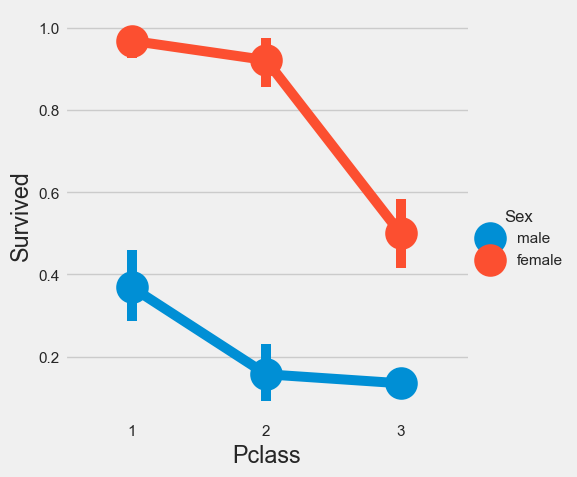

In [18]:
# factorplot, 카테고리컬 변수에 따른 시각화, y축은 평균값을 나타냄.
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_df)

Pclass1에 관계없이 남성 보다는 여성의 생존률이 더 높아보임(먼저 구조되었다고 보여짐)

### 성별(Sex), 객실 클래스(Pclass)별 평균 생존 확률

In [19]:
train_df[['Sex','Pclass','Survived']].groupby(['Sex', 'Pclass']).mean()

# 아래와 같이 해도 됨
# train_df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### 승객의 최대, 최소, 평균 나이

In [20]:
print('Oldereest Passenger was of : ', train_df['Age'].max(), 'Years')
print('Younged Passenger was of : ', train_df['Age'].min(), 'Years')
print('Average Passenger was of : ', train_df['Age'].mean(), 'Years')

Oldereest Passenger was of :  80.0 Years
Younged Passenger was of :  0.42 Years
Average Passenger was of :  29.69911764705882 Years


/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


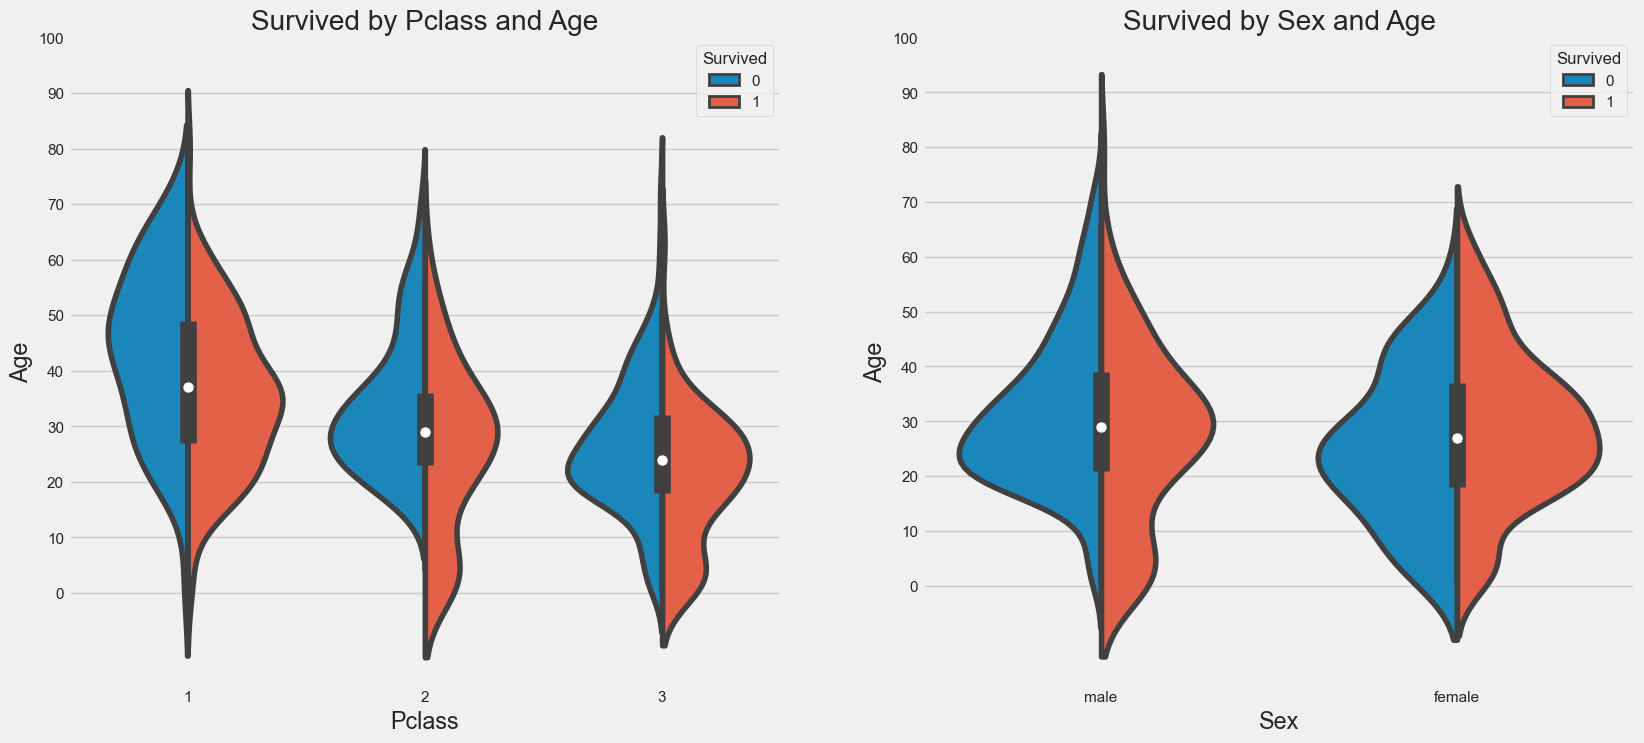

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# violinplot 시각화, 대칭성을 이용하여 한쪽만 남기고 split=True로 합침
# 첫 번째 그래프는 Pclasee에 따른 Age의 생존여부 시각화
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_df, split=True, ax=ax[0])
ax[0].set_title('Survived by Pclass and Age')
# yticks로 그래프의 눈금 최소, 최대, 단위 설정
ax[0].set_yticks(range(0,110,10))

# 두 번째 그래프는 Sex(성별)에 따른 Age의 생존여부 시각화
sns.violinplot('Sex', 'Age', hue='Survived', data=train_df, split=True, ax=ax[1])
ax[1].set_title('Survived by Sex and Age')
ax[1].set_yticks(range(0, 110, 10))

사망자의 나이대를 보면 20~30대가 가장 많다. (그래프가 가장 도드라짐)

In [22]:
# 이름중에 Mr, Mrs들어가는 사람의 나이중 결측값에 평균을 대입
train_df['Initial'] = 0
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.')
    #위 extraxt의 의미는 A-Z와 a-z의 문자중 다음 문자로 .이 따라오는 것을 추출

In [23]:
pd.crosstab(train_df.Initial, train_df.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


Mlle 또는 Mme와 같이 Miss를 나타내는 잘못된 이니셜이 있음. 오타라고 생각되는 이니셜들을 수정 (replace 사용)

In [24]:
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

그 후에 이니셜별 나이의 평균을 구해서 이니셜을 가진 승객의 나이가 결측치라면, 구한 평균값을 넣어줌

In [25]:
train_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

아래와 같이 이니셜별로 평균 나이를 넣어준다

In [26]:
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial=='Other'),'Age']=46

In [27]:
train_df.Age.isnull().any() # NuLL값이 있는지 확인

False

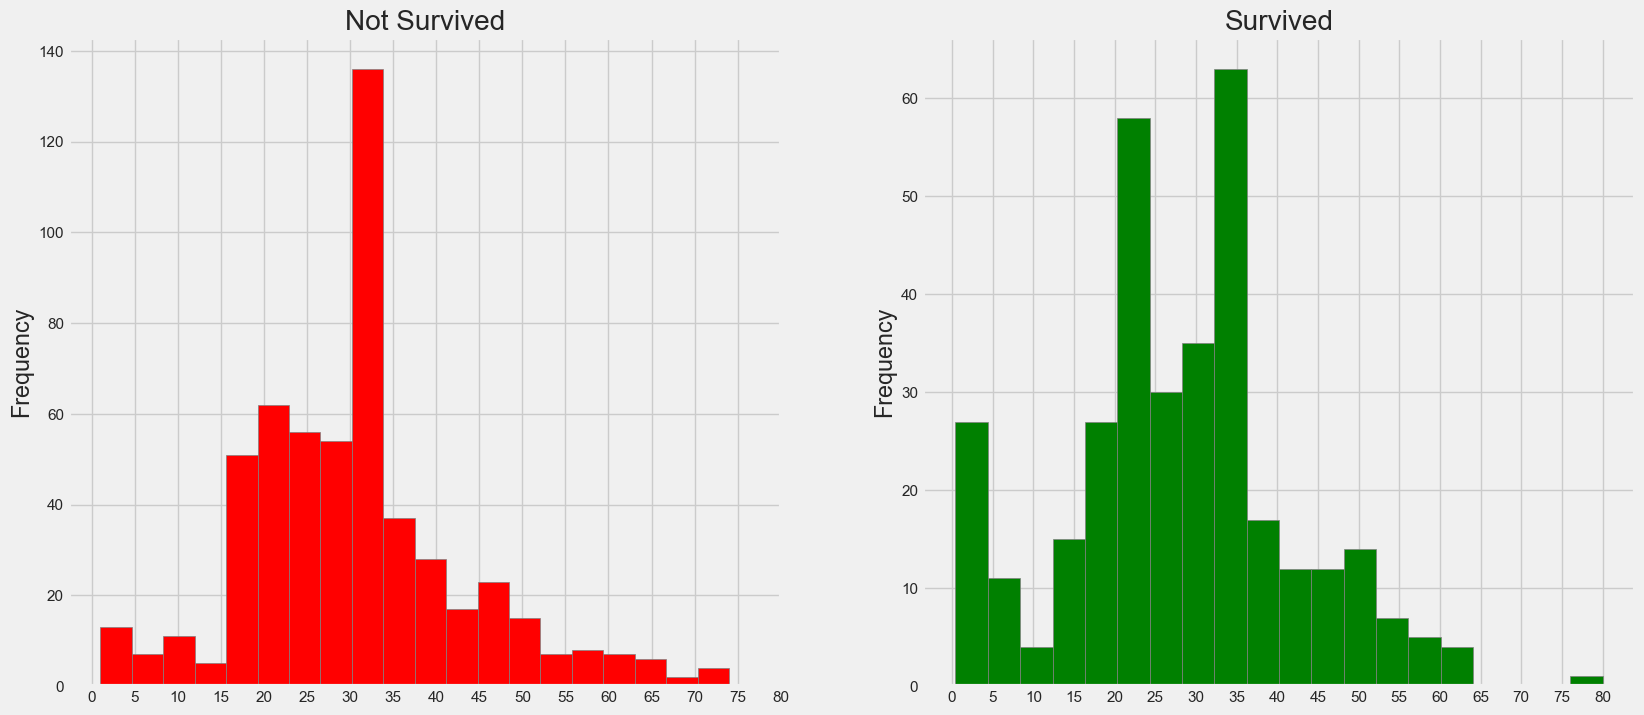

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

train_df[train_df.Survived == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='gray', color='red')
ax[0].set_title('Not Survived')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
train_df[train_df.Survived==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='gray')
ax[1].set_title('Survived')
ax[1].set_xticks(range(0, 85, 5))

사망자는 30부터 35세가 가장 많고, 생존자는 5세 미만의 어린이와 20부터 25세, 35세 내외가 많다. 80대 노인도 일부 생존

### Initial 별 생존율 확인

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


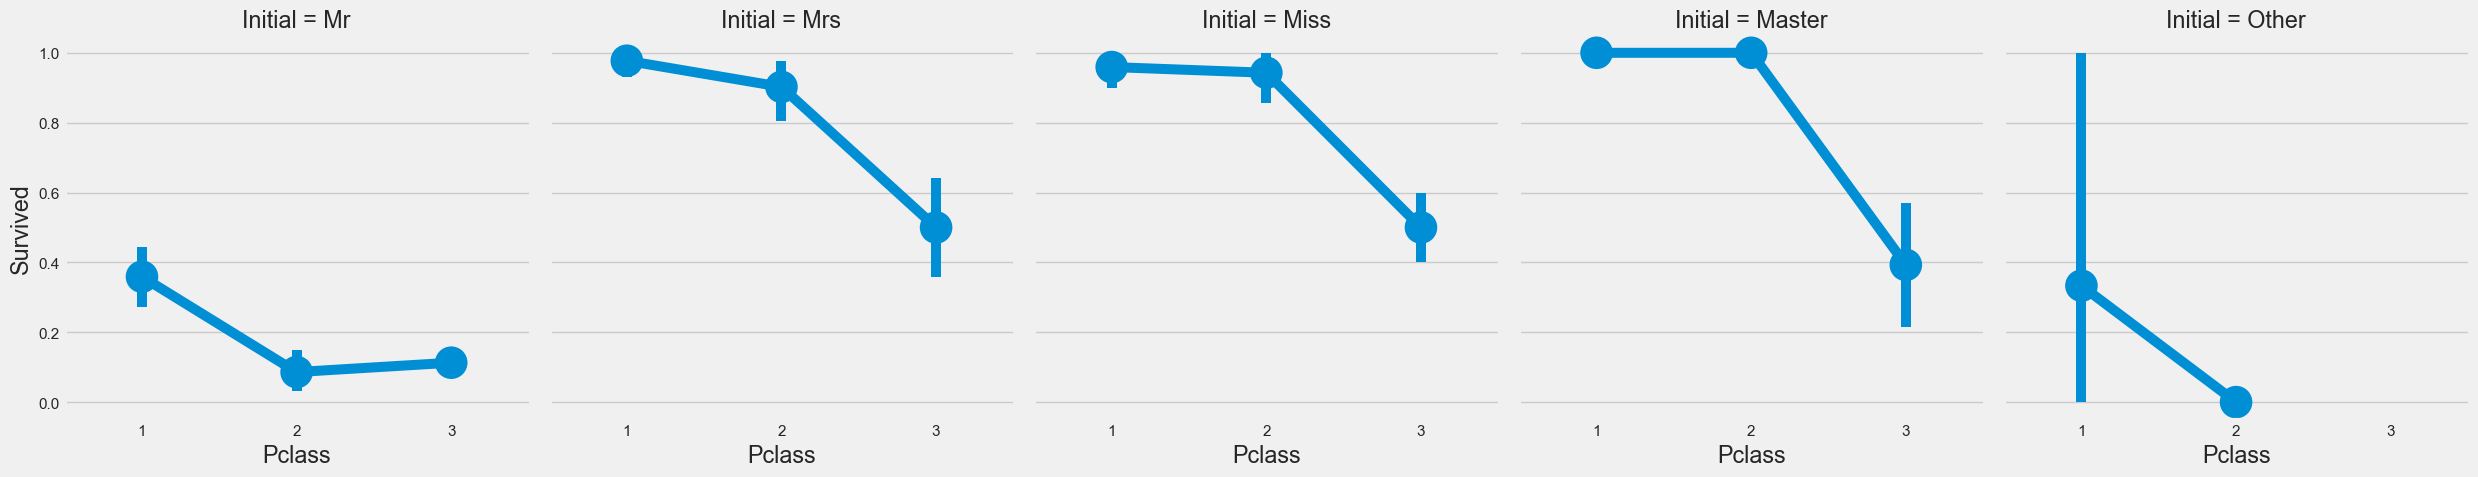

In [29]:
# factorplot, 카테고리컬 변수에 따른 시각화, y축은 평균값을 나타냄.

sns.factorplot('Pclass', 'Survived', col='Initial', data=train_df)

### Embarked Analysis (Embarked : 승객이 승선한 항구이름)

crosstab으로 변수 케이스 별 value_count

In [30]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

Embarked의 S항구의 탑승자가 가장 많으며, 동시에 S항구 탑승자의 남성의 사망이 가장 많은 것으로 보여짐 (여성중에서도 S 항구 탑승자의 사망자가 가장 많은 것으로 보여진다)

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


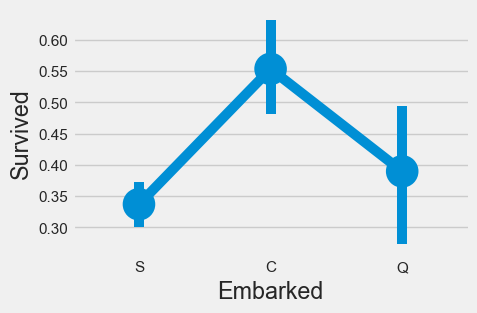

In [31]:
# factorplot, 카테고리컬 변수에 따른 시각화, y축은 평균값을 나타냄.
sns.factorplot('Embarked', 'Survived', data=train_df)
fig=plt.gcf()
fig.set_size_inches(5, 3)

# figure에 접근해야할 땐, plt.gcf()

factorplot으로 확인한 결과 S 항구 승객의 생존율이 가장 낮음

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

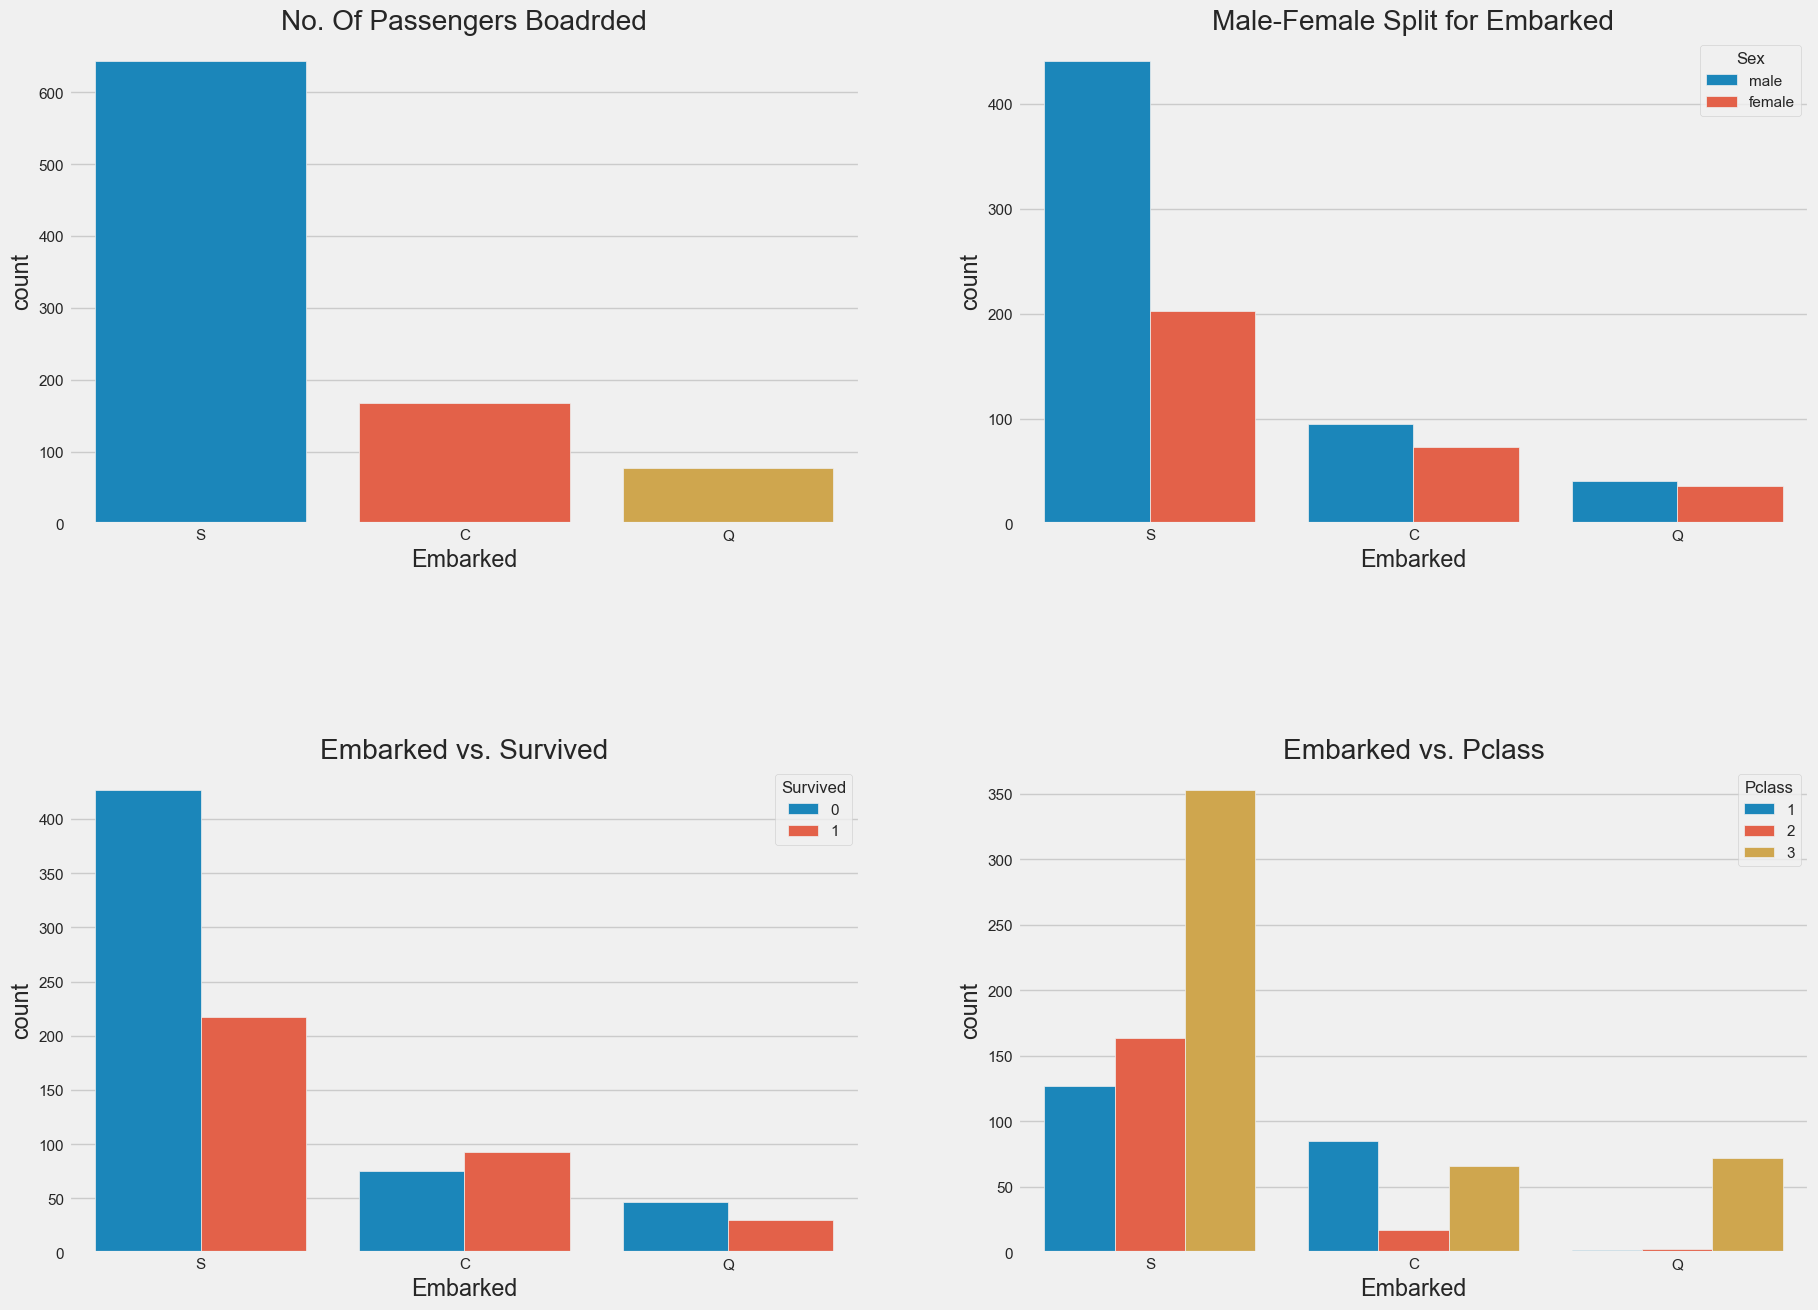

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=train_df, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boadrded')

sns.countplot('Embarked', hue='Sex', data=train_df, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=train_df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=train_df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [51]:
train_df.groupby(['Embarked', 'Pclass'])['Survived'].mean()

Embarked  Pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64

Embarked S의 생존율이 낮은 이유는 Pclass3 의 대략 81% 사람이 사망했기 때문

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


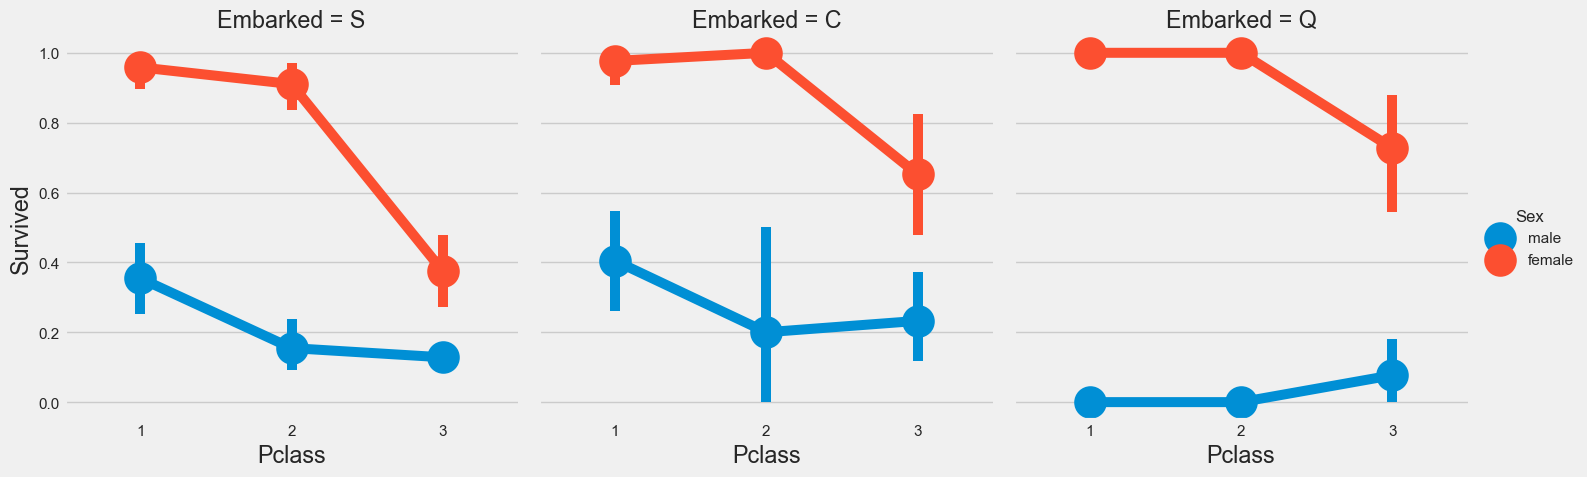

In [52]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train_df)

Embarked의 결측치는 최빈값(S)으로 채워준다.

In [53]:
# NULL value of Embakred
# Maximum passenger boarded from pors S, so replace Null with 'S'
train_df['Embarked'].fillna('S', inplace=True)

In [57]:
# 결측값이 있는지 확인
train_df.Embarked.isna().any()

False

### SibSp Analysis

SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

In [58]:
pd.crosstab(train_df.SibSp, train_df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SibSp vs Survived')

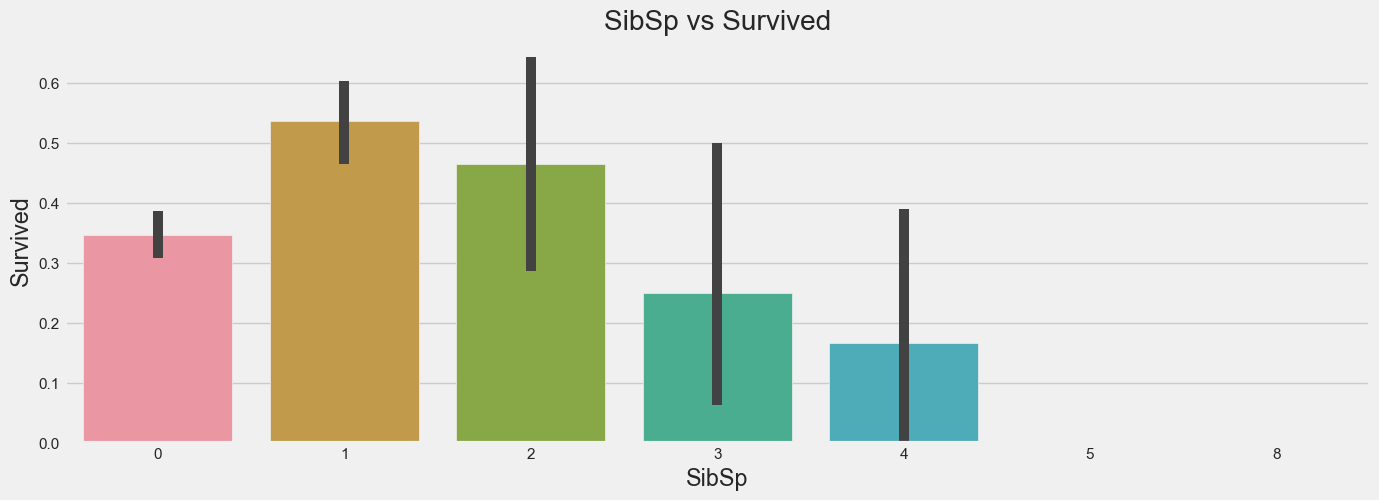

In [60]:
sns.barplot('SibSp', 'Survived', data=train_df).set_title('SibSp vs Survived')

# barplot에서 가는선은 추정치 (신뢰구간과 유사)
# 이 범위는 기본적으로 부트 스트랩 신뢰구간이라는 것을 사용
# 이 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것이라는 의미
# 신뢰구간이 아니라 표준편차를 표현하고 싶으면 파라미터로 ci="sd" 저장

SibSp 데이터 분석해보니 1, 2에 해당하는 승객의 생존율은 높은 편이지만, 혼자이거나 3 이상은 낮아짐

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'SibSp vs Survived')

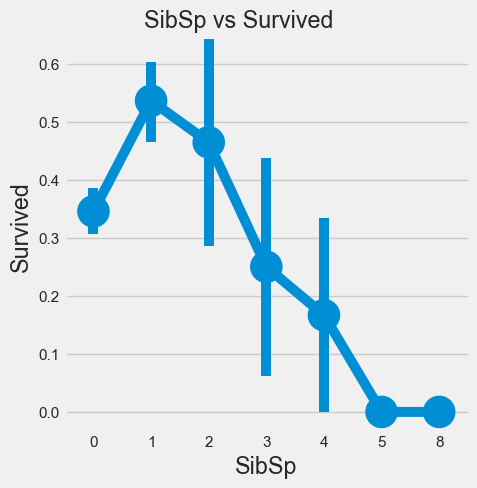

In [66]:
factor = sns.factorplot('SibSp', 'Survived', data=train_df, ax=ax[1])
factor.fig.suptitle('SibSp vs Survived')

In [67]:
pd.crosstab(train_df.SibSp, train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch Analysis

Parch : 동반한 Parent(부모) Child(자식)의 수

In [70]:
pd.crosstab(train_df.Parch, train_df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [71]:
pd.crosstab(train_df.Parch, train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Parch vs Survived')

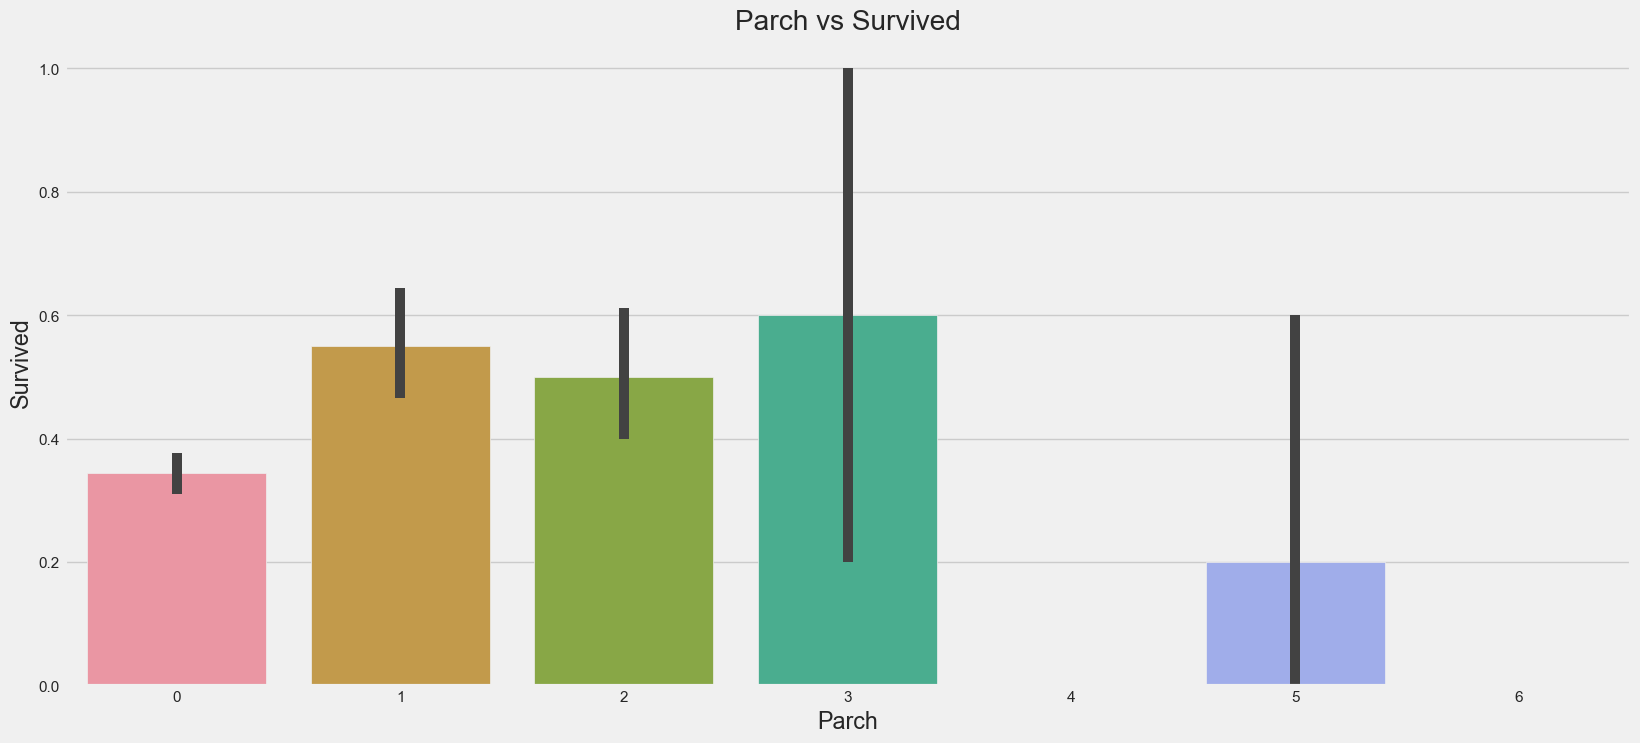

In [72]:
sns.barplot('Parch', 'Survived', data=train_df).set_title('Parch vs Survived')

/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Parch vs Survived')

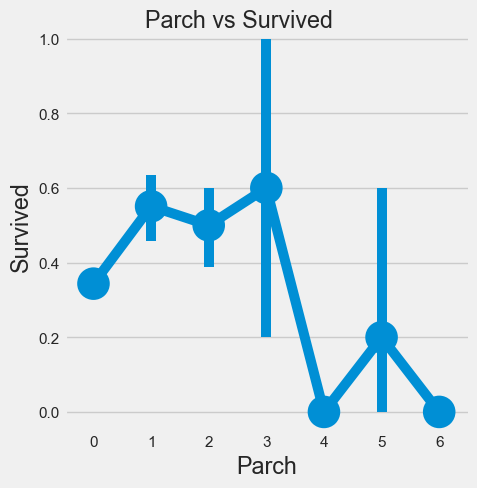

In [73]:
fac = sns.factorplot('Parch', 'Survived', data=train_df)
fac.fig.suptitle('Parch vs Survived')

Parch데이터는 1 ~ 3에 해당하는 승객은 생존율이 높고, 나머지는 낮다.

### Fare(continous) Analysis

Fare : 티켓의 요금

In [75]:
print('Highest Fare was : ', train_df['Fare'].max())
print('Lowest Fare was : ', train_df['Fare'].min())
print('Average Fare was : ', train_df['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.2042079685746


/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gwangyongkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

Text(0.5, 1.0, 'Fares in Pclass 3')

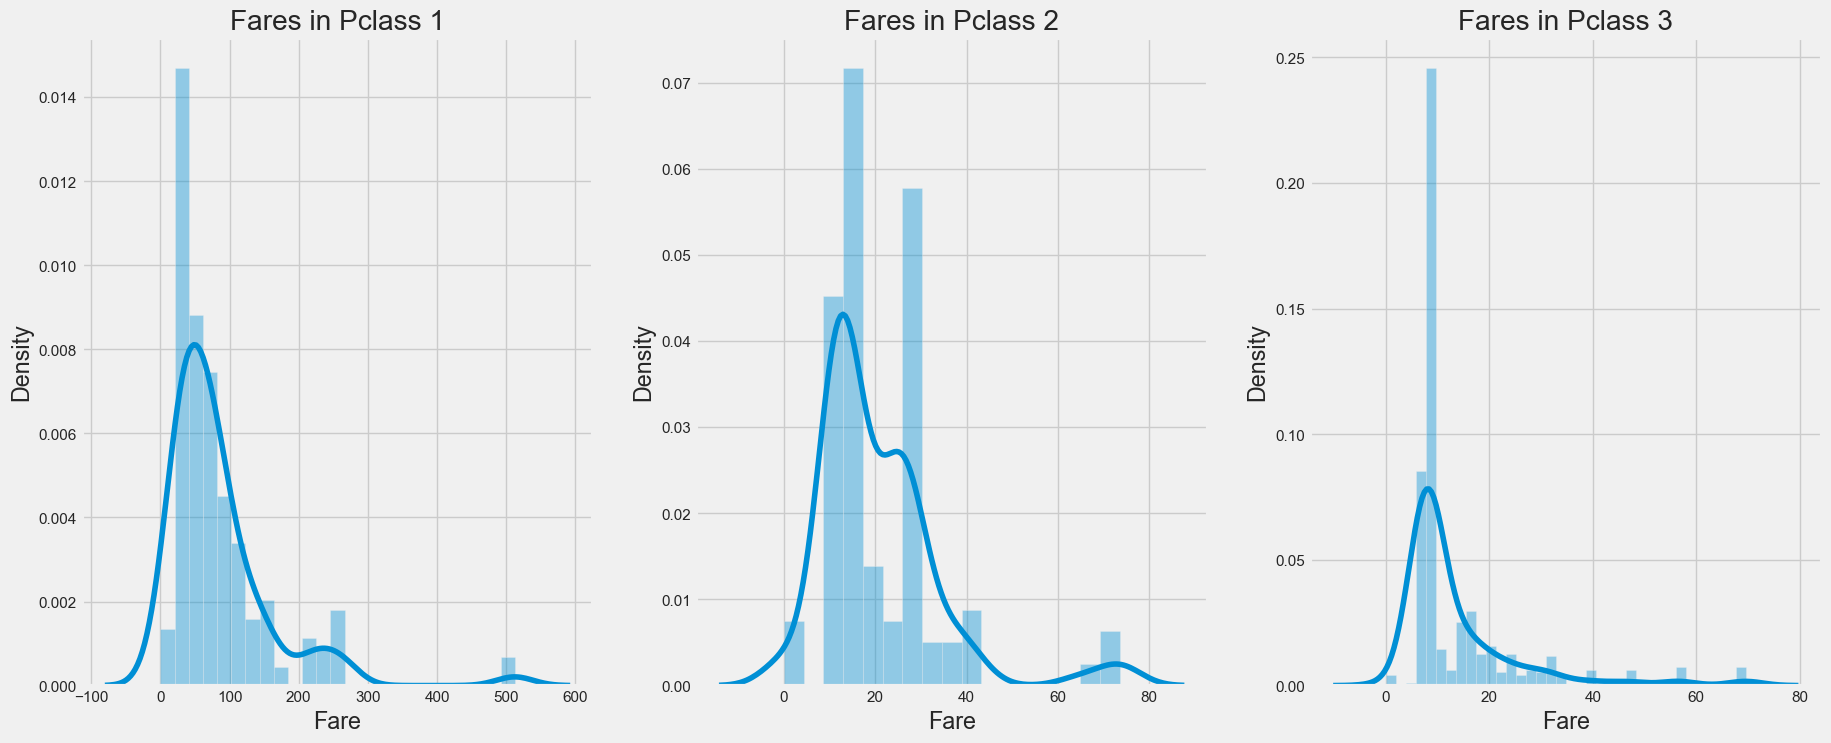

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(train_df[train_df['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(train_df[train_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(train_df[train_df['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

<!-- Sex : 남성보다 여성의 생존율이 높다. 이는 구조가 여성이 우선한다
Pclass : Pclass 1의 승객의 생존율이 높다. 반면에 3은 낮다. 여성에게는 Pclass 1이 거의 1등이고, 2등도 높다.
Age : 5~10살의 아이들의 생존율이 높고 15~35살의 성인들이 많이 사망했다.
Embarked : Q의 사람들은 대다수가 Pclass 3. Embarked중에서 C만 생존율이 사망률보다 높다.
Parch + SibSp : 1~2 SibSP, Spouse on board or 1~3 Parents의 생존율이 높다. 혼자오거나 대가족은 상대적으로 낮다. -->

### Sex : 남성보다 여성의 생존율이 높다. 이는 구조가 여성이 우선한다
### Pclass : Pclass 1의 승객의 생존율이 높다. 반면에 3은 낮다. 여성에게는 Pclass 1이 거의 1등이고, 2등도 높다.
### Age : 5 ~ 10살의 아이들의 생존율이 높고 15 ~ 35살의 성인들이 많이 사망했다.
### Embarked : Q의 사람들은 대다수가 Pclass 3. Embarked중에서 C만 생존율이 사망률보다 높다.
### Parch + SibSp : 1 ~ 2 SibSP, Spouse on board or 1 ~ 3 Parents의 생존율이 높다. 혼자오거나 대가족은 상대적으로 낮다.

## 상관계수(Correlation)

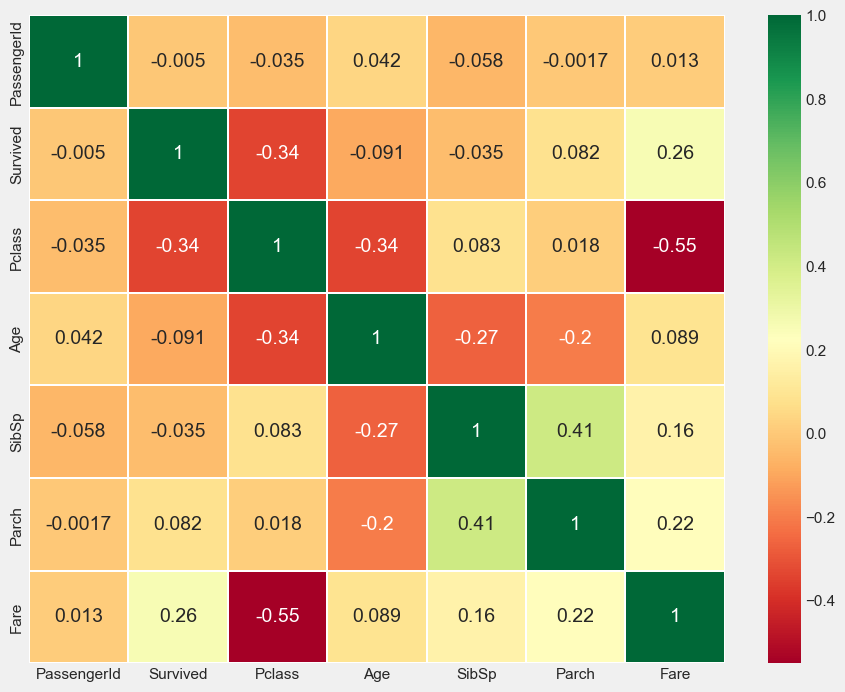

In [79]:
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# annot=True : 각 셀에 숫자를 입력
fig=plt.gcf()
fig.set_size_inches(10, 8)

# 알파벳이나 문자열 사이에 상관관계는 없기 때문에 수치형 변수에만 적용
# 만약 상관계수가 높다면 다중공산성 문제 발생
# 이는 ML 모델을 학습시킬 때 성능 약화

heat맵을 통해 각 변수끼리의 상관계수를 구했다. Pclass와 Fare의 상관계수는 상대적으로 높은 편에 속한다. 주의해서 봐야할 변수라고 생각.

# 데이터 정제

## Age

Age는 연속형 변수 -> ML모델에 문제가 발생할 가능성 있다.

연속형 변수를 범주형 변수로 변환하자(Binning or 표준화)

나이(0 ~ 80)을 5단위로 binning하자

In [82]:
train_df['Age_band'] = 0
train_df.loc[train_df['Age'] <= 16, 'Age_band'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df.Age <= 32), 'Age_band'] = 1
train_df.loc[(train_df.Age > 32) & (train_df.Age <= 48), 'Age_band'] = 2
train_df.loc[(train_df.Age > 48) & (train_df.Age <= 64), 'Age_band'] = 3
train_df.loc[train_df.Age > 64, 'Age_band'] = 4

In [83]:
train_df.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


https://velog.io/@lsmmay322/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-%EC%A0%9C%EB%8C%80%EB%A1%9C-%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EA%B8%B0